In [4]:
%load_ext autoreload
%autoreload 2
    
import time
import os
import multiprocessing
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
np.set_printoptions(legacy = '1.25')

import diem

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Importing The data and checking out the DiemType class

Here, we are importing the *test* dataset.  This will need to be changed to a final 'toy' dataset of our choice.  Could be this one still.  **to discuss**

In [5]:
dRawInput = diem.diemtype.new_import_raw_test_data()


Let's have a look inside:

In [6]:
vars(dRawInput)

{'DMBC': [array([[1, 3, 3, ..., 1, 3, 1],
         [1, 1, 3, ..., 1, 3, 1],
         [1, 1, 2, ..., 1, 3, 1],
         ...,
         [3, 1, 1, ..., 3, 1, 3],
         [3, 1, 1, ..., 0, 1, 3],
         [0, 0, 0, ..., 3, 1, 3]]),
  array([[1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         ...,
         [3, 1, 1, ..., 3, 3, 2],
         [3, 3, 1, ..., 3, 3, 1],
         [3, 1, 3, ..., 1, 1, 2]])],
 'indNames': array(['IP_RVcoll14H960', 'IP_RVcoll14F754', 'IP_RVcoll14E561', 'IP_504',
        'IP_502', 'IF_142', 'IP_RVcoll12R048', 'IF_236', 'IF_165',
        'IF_234', 'IF_RVcoll14B411', 'IF_RVcoll12N508', 'IF_RVcoll11F366',
        'IF_RVcoll17B439'], dtype=object),
 'chrPloidies': array([[1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]]),
 'chrNames': array(['iphiclides_podalirius.IP_504.v2_0.chromosome_Z',
        'iphiclides_podalirius.IP_504.v2_0.chromosome_2'], dtype=object),
 'posByChr': [

This class contains all the information about our data at input, and this is used as the starting point for all analyses in `diem`.  Inside, we have a lot of information, including: the chromosome names, their lengths, and the names of individuals.

For each Chromosome, we have
1. the respective ploidy of each individual in the same order as 'indNames'
2. the position of each site and corresponding position with chr length normalized to 1
3. The **Diem Matrix** (DMBC means Diem Matrix By Chromosome)

The **Diem Matrix** for a chromosome is an array.  Rows are individuals, columns represent sites.  Values are either 0 (for missing data), 1 (homozygous for one allele), 2 (heterozygous), or 3 (homozygous for a different allele).  It is this DMBC list that diem polarizes.

Note that on import, there are many attributes with a value *None*.  This is because these attributes relate to polarization and downstream analyses and are updated through the workflow.


We can plot the *painting* of an individual chromosome using the plot_painting function in diem.utils

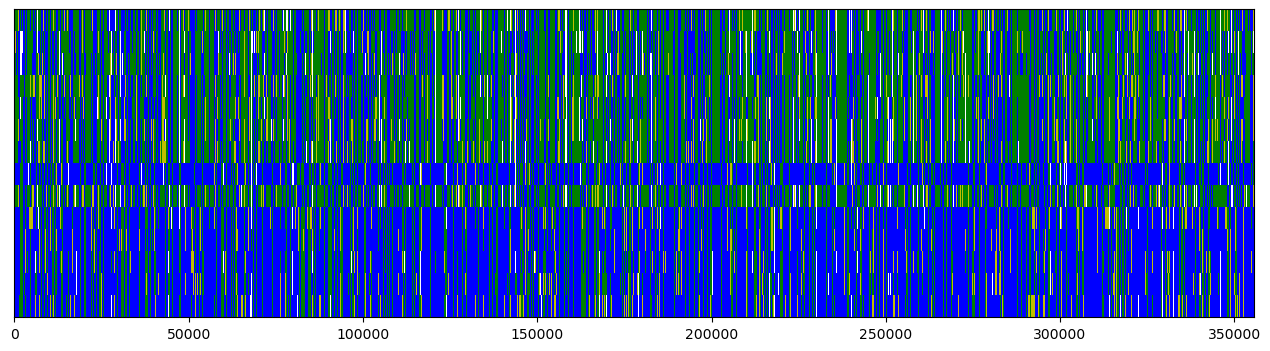

In [7]:
diem.utils.plot_painting(dRawInput.DMBC[1])

# Polarizing - the overview

Here we will look at polarizing the data. Polarization occurs simultaneously across all sites (yes, that means that all chromosomes are polarized at once, NOT individually). 

Note, however, we can restrict the *information* used for polarizing (all) the data to a subset of individuals or a subset of sites.  We will look at that in more detail in a later section.  

For now, we will do a simple polarization using the information across all sites and the default parameters. To do this, we use the polarize() function of the DiemType class.   Note that for illustration, we are setting the optional argument 'boolTestData = True', but for analyzing your own data, this argument should either be omitted or set to 'False'. 

In [8]:
dPolarized = dRawInput.polarize(boolTestData = True) 

convert state matrix to Marray
initializing test polarity
running EM algorithm on a single core using diem_linear
starting
 num individuals in MBC is  14
iteration  0   num 0 polarity =  453158   num 1 polarity =  453157
time for iteration in seconds:  3.6669652462005615
iteration  1   num 0 polarity =  585141   num 1 polarity =  321174
time for iteration in seconds:  3.161003589630127
iteration  2   num 0 polarity =  628702   num 1 polarity =  277613
time for iteration in seconds:  3.2100675106048584
iteration  3   num 0 polarity =  630008   num 1 polarity =  276307
time for iteration in seconds:  3.1413025856018066
iteration  4   num 0 polarity =  630170   num 1 polarity =  276145
time for iteration in seconds:  3.3793489933013916
iteration  5   num 0 polarity =  630196   num 1 polarity =  276119
time for iteration in seconds:  3.208670139312744
iteration  6   num 0 polarity =  630193   num 1 polarity =  276122
polarity found
time for iteration in seconds:  3.34915828704834
polarity 

Polarization returns a new instance of the diem class with updated polarity and additional information from the EM algorithm.

In [9]:
vars(dPolarized)

{'DMBC': [array([[1, 1, 1, ..., 1, 1, 1],
         [1, 3, 1, ..., 1, 1, 1],
         [1, 3, 2, ..., 1, 1, 1],
         ...,
         [3, 3, 3, ..., 3, 3, 3],
         [3, 3, 3, ..., 0, 3, 3],
         [0, 0, 0, ..., 3, 3, 3]]),
  array([[1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         ...,
         [3, 1, 1, ..., 3, 3, 2],
         [3, 3, 1, ..., 3, 3, 1],
         [3, 1, 3, ..., 1, 1, 2]])],
 'indNames': array(['IP_RVcoll14H960', 'IP_RVcoll14F754', 'IP_RVcoll14E561', 'IP_504',
        'IP_502', 'IF_142', 'IP_RVcoll12R048', 'IF_236', 'IF_165',
        'IF_234', 'IF_RVcoll14B411', 'IF_RVcoll12N508', 'IF_RVcoll11F366',
        'IF_RVcoll17B439'], dtype=object),
 'chrPloidies': array([[1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]]),
 'chrNames': array(['iphiclides_podalirius.IP_504.v2_0.chromosome_Z',
        'iphiclides_podalirius.IP_504.v2_0.chromosome_2'], dtype=object),
 'posByChr': [

We can see that the polarized diemtype now has values assigned to the following attributes:
initialPolByChromosome, PolByChr (the output), DIByChr, supportByChr, and HIs (hybrid indices).

Let's compare the data before and after polarizing:

In [10]:
diem.tests.compare_DiemTypes(dRawInput,dPolarized)

Now checking list attributes
checking DMBC
Attribute  DMBC  differs for chromosome  0
Attribute  DMBC  differs for chromosome  1
checking PolByChr
Attribute  PolByChr  differs (one is None, the other is not)
checking DIByChr
Attribute  DIByChr  differs (one is None, the other is not)
checking SupportByChr
Attribute  SupportByChr  differs (one is None, the other is not)
checking posByChr
checking MapBC
checking chrPloidies
checking initialPolByChr
Attribute  initialPolByChr  differs (one is None, the other is not)
Now checking non-list attributes
Attribute  HIs  differs (one is None, the other is not)
Now checking float attributes
now checking individual exclusions
now checking site exclusions
previous attributes failed, so skipping contigMatrix check
The following attributes differed:  ['SupportByChr', 'PolByChr', 'HIs', 'initialPolByChr', 'DIByChr', 'DMBC']


Indeed, we see that DMBC, SupportsByChr, DIByChr, PolByChr, and HIs all differ between the two. 

This is what the polarized data now looks like:

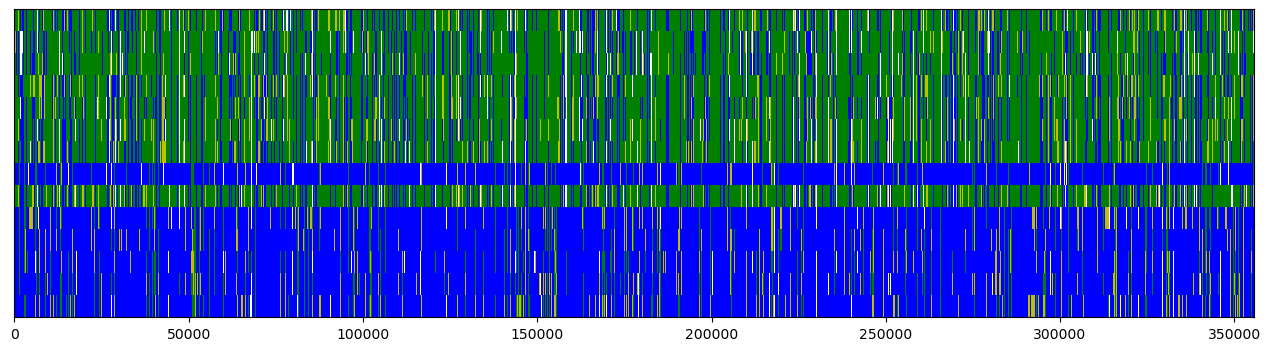

In [11]:
diem.utils.plot_painting(dPolarized.DMBC[1])

To see what the intial *null* polarity looked like, we can recover it using the diemtype.flip_polarity() function, telling it to switch to the initial polarity from the final (current) polarity.

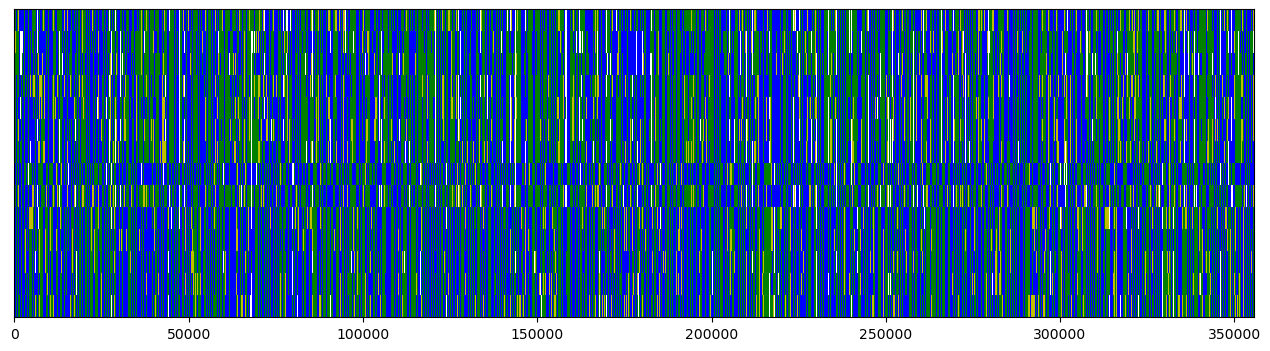

In [12]:
initDM_idx1 = diem.diemtype.flip_polarity(dPolarized.DMBC[1],newPolarity=dPolarized.initialPolByChr[1],oldPolarity=dPolarized.PolByChr[1])
diem.utils.plot_painting(initDM_idx1)

# Calculating the Hybrid Indices and Sorting the Data

The EM algorithm works to separate out individuals by hybrid index and assign them to either side of a barrier. After Polarizing and before downstream analyses, it is useful to re-sort the data so that individuals are ordered by hybrid index.

Note, the sort function **modifies the diemtype instance in place** so for illustration, here we will first copy the polarized data, then sort it.  Individuals will now be sorted by hybrid index, and this new sorting will be reflected for all attributes with an individual-level sorting (for example, the rows of a given diem matrix, e.g DMBC[1])

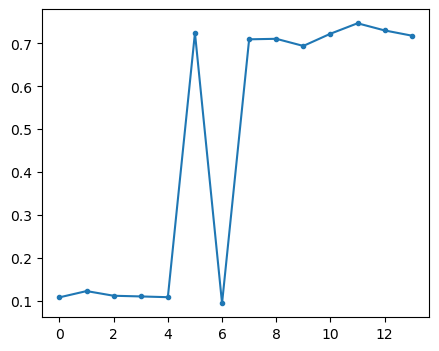

In [13]:
plt.figure(figsize=(5,4))
plt.plot(dPolarized.HIs,marker='.',)
plt.show()

new HIs computer and individuals resorted by HI


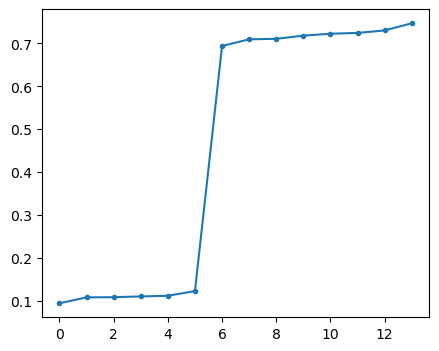

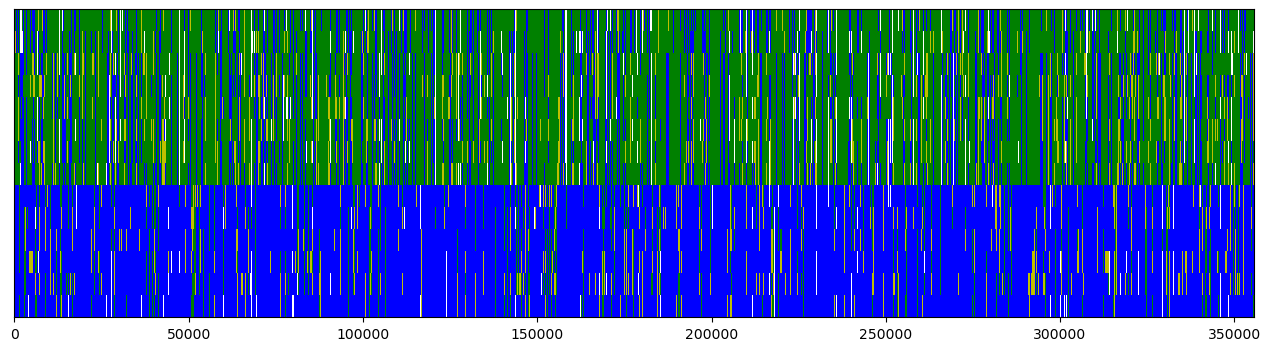

In [14]:
dSorted = dPolarized.copy()
dSorted.sort()
plt.figure(figsize=(5,4))
plt.plot(dSorted.HIs,marker='.')
plt.show()
diem.utils.plot_painting(dSorted.DMBC[1])

Note: it is possible to resort individuals to make two different diemtype objects have the same sorting.  
1. The self.sort_as(other) function which takes a difrerent 'other' diemtype instance and will resort 'self' by the order of 'other'.
2. You can also self.sort_by(newOrder), which takes an ordering as a list or array of integers

# exploring the data

## distribution of diagnostic indices


Here, we introduce the notion of a marker configuration.  Each site has one of many possible unique marker configurations.  A marker configuration is simply the vector of 0,1,2,3 that gives the state of each individual at that site.  Many sites will have the same marker configuration. Each marker configuration is associated with its own diagnostic index. 

Below, we plot a histogram of the diagnostic indices seen in the data. The magenta colour includes the repeat occurances, while the green colour shows the distribution of *unique* DI values, each corresponding to a specific *unique* marker configuration.

The marker with the highest diagnostic index is nearest 0.  In green, we see that this is the single marker in the far right bin. When we account for how often this occurs (magenta), we see that this is also the most common marker in the dataset. 

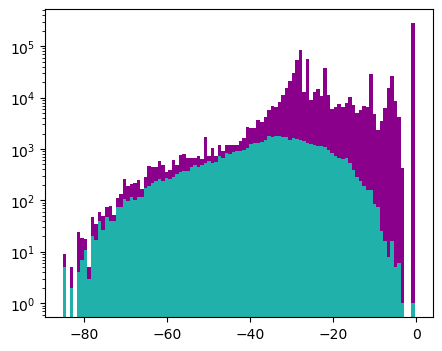

In [15]:
DIValsWithRepeats = np.hstack(dSorted.DIByChr)
DIValsUnique = np.unique(DIValsWithRepeats)
plt.figure(figsize=(5,4))
(counts,bins,patches) = plt.hist(DIValsWithRepeats,bins=100,color='darkmagenta')
plt.hist(DIValsUnique,bins=bins,color='lightseagreen')
plt.yscale('log')
plt.show()

## characterizing marker configurations

We can use the diem.utils.characterize_markers to get informationa bout the types of marker configurations we have.

**note** It is very useful to have the individuals sorted by hybrid index when thinking about marker configurations, so we use the diemtype instance dSorted below.

Here, a marker configuration is the array of states for the individuals at any particular site.  The marker configuration with the highest DI is the 'ideal marker' which separates individuals onto each side of a barrier.  It is also likely to be by-far the most common configuration in the data.  

For each marker configuration, we get the number of times it appears in the data, the corresponding diagnostic index, how many individuals have a state differing from the ideal marker, and the number of individuals with missing data for that marker configuration.

In [16]:
markerDF = diem.utils.characterize_markers(dSorted)
idealMarker = markerDF.iloc[0]['configuration']
print('ideal marker is',idealMarker)
markerDF

ideal marker is (1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3)


,configuration,count,DI,diffs_from_ideal,individuals_missing
0,"(1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3)",278313,-0.302201,0,0
1,"(1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3)",433,-3.381426,1,0
2,"(1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3)",230,-3.782677,1,0
3,"(1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3)",179,-3.821299,1,0
4,"(1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3)",606,-4.017948,1,0
...,...,...,...,...,...
54958,"(0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0)",1,-84.438500,13,12
54959,"(0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0)",4,-84.684152,13,12
54960,"(0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0)",1,-84.878695,13,12
54961,"(0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0)",1,-85.163934,13,12


We can use this to help guide us in choosing threshold values, for example, we can look at the dataframe restricted to marker configurations with at most three differences from the ideal makrer.  The minimum DI of which could provide a threshold to use on our data. 

In [17]:
atMostThreeDF = markerDF[markerDF['diffs_from_ideal']<=3]
thisThreshold = min(atMostThreeDF['DI'])
print(thisThreshold)

-25.997900830115373


And we can check the proportion of sites that will be retained by appyling this threshold.

In [18]:
diem.utils.check_coverage_after_thresholding(dSorted,thisThreshold)

[0.6022922740193808, 0.6169519633471062]

# deciding on and applying a threshold 

For Zia, we picked a threshold by taking the lowest value required to include all marker configurations with at most two differences from the 'ideal marker'.  I made a sort of table of the threshold value as a function of the number of differences.

We also looked at how the choice of threshold affected the number of sites retained in each chromsoome.  I also tried to make some plots about marker properties and threshold choices, but I don't know how interesting or useful they ctually were.

**@ stuart** you are going to have to decide what you think is an appropriate 'standard' workflow here.  It's easy to put together the code for it (whatever functions we want to add to diem.utils) as well as the tutorial here.

Once we have decided on a threshold, it is easy to apply it using the apply_threshold() function of the diemtype class:


In [19]:
myThreshold = -26
dThresholded = dSorted.apply_threshold(myThreshold)

proportion of each chromosome retained after thresholding:
[0.6022940904013296, 0.6169772605897068]
thresholding done
hybrid indices have likely changed, but have not been updated
to update HIs without re-sorting, update the attribute a.HIs = a.computeHIs()
You may also call the sort() method on the resulting data if you wish to both re-compute and resort


In [20]:
vars(dThresholded)

{'DMBC': [array([[2, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [2, 1, 1, ..., 1, 1, 1],
         ...,
         [3, 3, 3, ..., 3, 3, 3],
         [3, 3, 3, ..., 0, 3, 3],
         [3, 3, 2, ..., 3, 3, 3]]),
  array([[1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         ...,
         [3, 3, 1, ..., 1, 1, 1],
         [3, 1, 3, ..., 3, 3, 3],
         [3, 1, 3, ..., 3, 3, 3]])],
 'indNames': array(['IP_RVcoll12R048', 'IP_RVcoll14H960', 'IP_502', 'IP_504',
        'IP_RVcoll14E561', 'IP_RVcoll14F754', 'IF_234', 'IF_236', 'IF_165',
        'IF_RVcoll17B439', 'IF_RVcoll14B411', 'IF_142', 'IF_RVcoll11F366',
        'IF_RVcoll12N508'], dtype=object),
 'chrPloidies': array([[2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]]),
 'chrNames': array(['iphiclides_podalirius.IP_504.v2_0.chromosome_Z',
        'iphiclides_podalirius.IP_504.v2_0.chromosome_2'], dtype=object),
 'posByChr': [

apply_threshold() returns a new diemtype instance. The 'threshold' attribute is set to the chosen value, and all sites with DI below that threshold have been removed from the data. 

**Note, after thresholding, the hybrid indices need to be re-calculated, and it is possible that the individual orders could change.**

**how do we want to handle this?  I.e. When should we re-caculate hybrid indices behind the scenes and when should we not?  One opton is that anytime we alter the data in a way that could change hybrid indices, we simply set them to None again** 

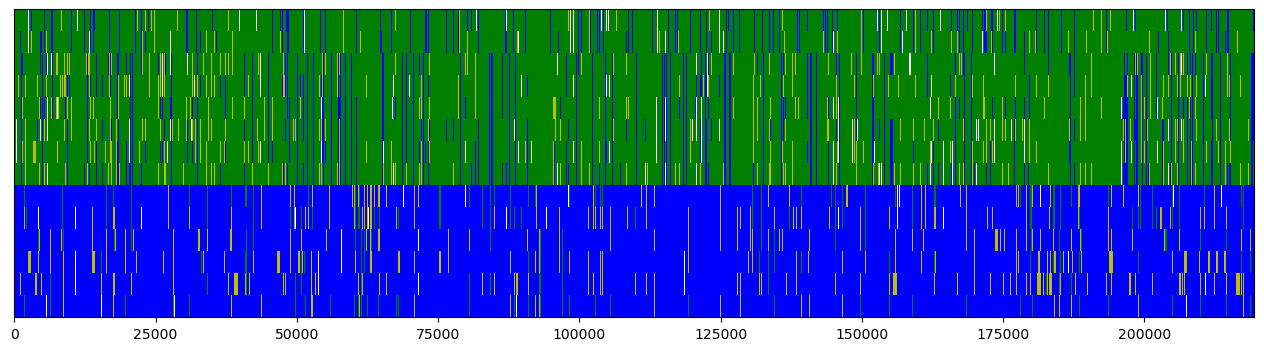

In [21]:
diem.utils.plot_painting(dThresholded.DMBC[1])

# deciding on a smoothing scale

Here, I just tried several smoothing scales and plotted the number of sites that changed due to smoothing ( across all individuals and chromosomes) using the diem.utils.count_site_differences() function.  This function takes the DMBC of two different diemtype instances and returns the number of sites that differ, compare chromosome-by-chromosome and individual-by-individual.

We can see how  this levels out once the small bits have been smoothed over, and we took that as our scale... 

However, there are plenty more ways of looking at this.  Particularly interesting might be the distribution of the size of tracts which were smoothed, but that is more complicated.  

An example workflow using just sites that changed by smoothing is below

In [22]:
scalesToTry = [1e-6,5e-6,1e-5,5e-5,1e-4,5e-4]
sitesDiffByScale = []
for scale in scalesToTry:
    dSmoothedTest = dThresholded.smooth(scale)
    kdiffs = diem.utils.count_site_differences(dSmoothedTest.DMBC,dThresholded.DMBC)
    sitesDiffByScale.append(kdiffs)


smoothing the data with scale  1e-06
smoothing done, but not resorting by HI. You may call the sort() method on the resulting data if you wish to resort
smoothing the data with scale  5e-06
smoothing done, but not resorting by HI. You may call the sort() method on the resulting data if you wish to resort
smoothing the data with scale  1e-05
smoothing done, but not resorting by HI. You may call the sort() method on the resulting data if you wish to resort
smoothing the data with scale  5e-05
smoothing done, but not resorting by HI. You may call the sort() method on the resulting data if you wish to resort
smoothing the data with scale  0.0001
smoothing done, but not resorting by HI. You may call the sort() method on the resulting data if you wish to resort
smoothing the data with scale  0.0005
smoothing done, but not resorting by HI. You may call the sort() method on the resulting data if you wish to resort


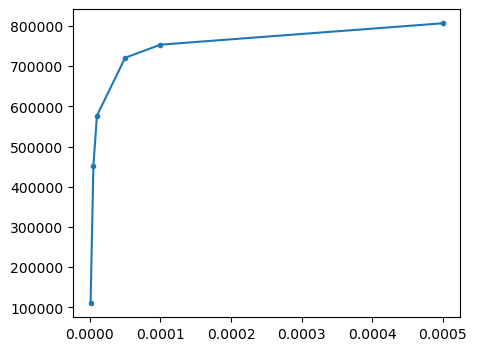

In [23]:
plt.figure(figsize=(5,4))
plt.plot(scalesToTry,sitesDiffByScale,marker='.')
plt.show()

We see that the number of sites that are affected by smoothing plataeus around 1e-4. This suggests we have smoothed over many of the short tracts generated, for example, by gene conversion.  

smoothing the data with scale  0.0001
smoothing done, but not resorting by HI. You may call the sort() method on the resulting data if you wish to resort


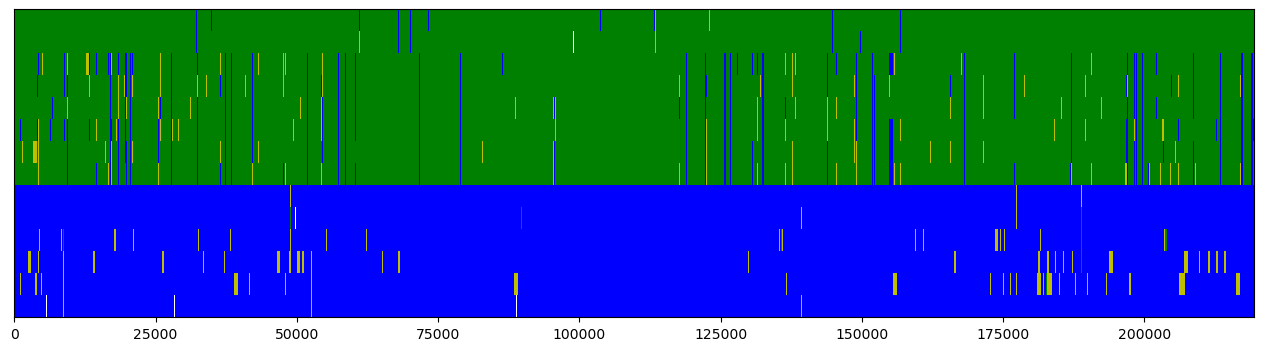

In [24]:
dSmoothed = dThresholded.smooth(1e-4)
diem.utils.plot_painting(dSmoothed.DMBC[1])

# constructing contigs and outputting bed-like file

Once we are happy with the 'final' data from our workflow above, we are ready to make contigs.

Contigs are a per-individual and per-chromosome construct. It contains the chromosome name, the individual to which it belongs, as well as a list of intervals that describe the data (from left to right along the chromsome). 

An interval simply records a tract of consecutive sites with the same state.  Each interval knows the chromosome and individual to which it belongs, the index of the left and right sites in the genome that define the interval, the corresponding physical position in basepairs, and the state of the interval (i.e. 0,1,2, or 3)

We construct contigs for a given diplotype IN PLACE, so it corresponds exactly to the data in the DMBC, and the number of intervals is determined by how much states change along a chromosome.  If we construct contigs for the thresholded (but not smoothed) data, there will be many many such contigs, and it will eat up a lot of memory. Constructing contigs before thresholding would be even worse, and we strongly recommend you do not try it.


NOTE that as a default, intervals of length 1 (single sites) are included as intervals, though they have effectively 0 span. To exclude single-site intervals, pass the optional argument "includeSingle = True" to create_contig_matrix() 


In [25]:
dSmoothed.create_contig_matrix()

contig matrix created and stored in self.contigMatrix


The contig matrix has rows as chromosomes and columns as individuals, similar to the DMBC, and each entry is an instance of a contig:

In [26]:
dSmoothed.contigMatrix

array([[<diem.contigs.Contig object at 0x7b0cf17b2510>,
        <diem.contigs.Contig object at 0x7b0ceb2d55c0>]], dtype=object)

Below, we see that a contig contains info about the number of intervals, the individual name, the chromsome name, and the list of intervals.

In [27]:
exampleContig = dSmoothed.contigMatrix[0][0]
exampleContig.__dict__

{'intervals': [<diem.contigs.Interval at 0x7b0cf17b1fd0>,
 'num_intervals': 17,
 'indName': 'IP_RVcoll12R048',
 'chrName': 'iphiclides_podalirius.IP_504.v2_0.chromosome_Z'}

Here, we look at the first interval in that list:

In [28]:
exampleInterval = exampleContig.intervals[0]
exampleInterval.__dict__

{'chrName': 'iphiclides_podalirius.IP_504.v2_0.chromosome_Z',
 'indName': 'IP_RVcoll12R048',
 'idxl': 0,
 'idxr': 20856,
 'l': 113,
 'r': 1075623,
 'state': 1}

We can use the diemtype's built-in get_intervals_of_state() function to access particular intervals from the data. Here's the documentation:


In [29]:
help(diem.diemtype.DiemType.get_intervals_of_state)

Help on function get_intervals_of_state in module diem.diemtype:

get_intervals_of_state(
    self,
    state,
    individualSubset=None,
    chromosomeSubset=None
)
    Get intervals of a specified state for given individuals and chromosomes.

    Args:
        state (int): The state to find intervals for (0, 1, 2, or 3).
        individualSubset (List[int], optional): List of individual indices to include. If None, includes all individuals.
        chromosomeSubset (List[int], optional): List of chromosome indices to include. If None, includes all chromosomes.

    Returns:
        List[Interval]: A list of Interval objects for the specified state across the specified individuals and chromosomes.



The documentation tells us that this function has the required argument 'state', and two optional arguments for individualSubset and chromosomeSubset, both of which default to None. The default behaviour is therefore to return a list of all intervals of the chosen state across all individuals and across all chromsomes:

num of spans with length of 0 (i.e. only one site) 43


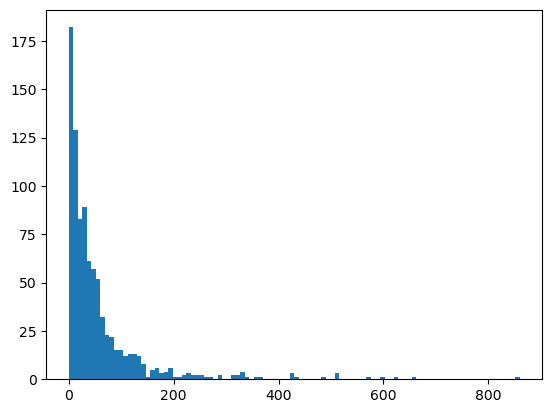

In [30]:
thisState = 2

testIntervalList = dSmoothed.get_intervals_of_state(thisState)
spans = np.array([x.idxr - x.idxl for x in testIntervalList])

print('num of spans with length of 0 (i.e. only one site)', sum(spans==0))
plt.hist(spans,bins=100)
plt.show()

Next, let's check out the optional subsetting arguments for chromosomes and individuals. Why do this? For example, we may want to compare intervals of state '2' between the X chromosome and the autosome in our data set. Alternatively, we may want to compare the length of heterozygous tracts on opposite sides of the barrier.

Below, we plot the distribution of spans for intervals with state 2, comparing individuals from different sides of the barrier, and restricting our analysis to intervals only on chromosome with index 1 (the autosome in our test data).

From characterizing the markers above, and looking at the ideal marker configuration, we know that individuals indexed 0,1,2,3,4,5 are on the '1' side of the barrier and 6,7,8,9,10,11,12, and 13 are from the other '3' side of the barrier. 

We can seen agreement with the corresponding chromosome painting above (using diem.utils.plot_painting(dSmoothed.DMBC[1])). The indiviudals 0,1,2,3,4,5 on the '1' side of the barrier (blue in the painting) do indeed appear longer than those on the other side of the barrier (green in the painting).  

num of spans with 0 length for [0, 1, 2, 3, 4, 5] is 13
num of spans with 0 length for [6, 7, 8, 9, 10, 11, 12, 13] is 22


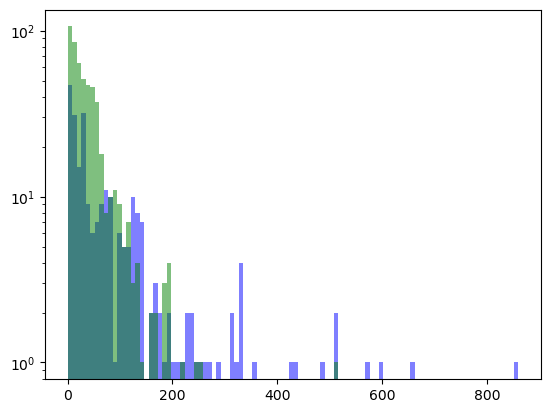

In [31]:
thisState = 2

individualsSubsetted= [0,1,2,3,4,5]
testIntervalList = dSmoothed.get_intervals_of_state(thisState,individualSubset=individualsSubsetted,chromosomeSubset=[1])
spans = np.array([x.idxr - x.idxl for x in testIntervalList])
print('num of spans with 0 length for',individualsSubsetted,'is', sum(spans==0))
n,bins,patches = plt.hist(spans,color = 'b',bins=100,alpha=0.5)

individualsSubsetted= [6,7,8,9,10,11,12,13]
testIntervalList = dSmoothed.get_intervals_of_state(thisState,individualSubset=individualsSubsetted,chromosomeSubset=[1])
spans = np.array([x.idxr - x.idxl for x in testIntervalList])
print('num of spans with 0 length for',individualsSubsetted,'is', sum(spans==0))
plt.hist(spans,bins=bins,color='g',alpha=0.5)

plt.yscale('log')
plt.show()

**saving the contigs to a bed-like file**

We can store the key information about the intervals in a bed-like file. We do this by creating a bed file **for each individual separately**.

For each individual, columns are for chromosome Name, left position (0-indcexed), right position (0-indexed), and state.  Note that the left and right 'indices' of the flanking mutatins is **not** recorded in the bed like file and is only stored in the diem interval class objects.  

We simply need to define a path to the folder in which to store the per-individual files.  A file will be automatically generated for each individual.

/path_to_output_directory/contig_bed_files/



# Advance Polarization options:


above, we looked at an example of polarizing using the default parameters.  Here, we look at the advanced options for polarizing the data. Let's look at the help for this function:

In [32]:
help(diem.diemtype.DiemType.polarize)

Help on function polarize in module diem.diemtype:

polarize(
    self,
    ncores=1,
    boolTestData=False,
    maxItt=500,
    epsilon=0.99,
    sort_by_HI=False
)
    Polarize the state matrices by initializing test polarities and running the EM algorithm. Does not change self, but rather returns a polarized copy. Note that it will use the individual and site exclusions defined in self.

    Args:
        ncores (int): number of cores to use for parallel processing. If 1, runs in serial.
        boolTestData (bool): if True, initializes polarity using test data method. If False, initializes polarity randomly.
        maxItt (int, optional): Maximum number of iterations for the EM algorithm. Default is 500.
        epsilon (float, optional): Convergence threshold for the EM algorithm. Default is 0.99

    Returns:
        DiemType: A new DiemType instance with polarized data.



The default is to polarize using a single core.  However, for large datasets, we can parallelize this over any number of cores, though with diminishign returns. Caution, though, as this may also require additional memory resources **need to check this**

The option boolTestData is for debugging purposes only, and should be left as 'False' unless working with the developers on an issue with the code.

**note** that the site exclusions and individual exclusions, if there are any, should be imported with the raw data. These are used automatically used during polarization.  It is also possible to add these exclusions manually after import (as we will see below to illustrate how this works).  

Let's create a diem input with exclusions.  The exclusions will usually automatically be loaded on data input, but it is also possible to add them manually. To do this, We make a copy of the raw input diem object, then assign values to those attributes.  We excluded individuals 2 and 3 (by name) and we excluded the first 10k sites from the second chromosome

In [33]:
dRawWithExclusions = dRawInput.copy()
dRawWithExclusions.indExclusions = dRawInput.indNames[2:4]
dRawWithExclusions.siteExclusionsByChr = [ None, np.arange(10_000)]
dRawWithExclusions.__dict__

{'DMBC': [array([[1, 3, 3, ..., 1, 3, 1],
         [1, 1, 3, ..., 1, 3, 1],
         [1, 1, 2, ..., 1, 3, 1],
         ...,
         [3, 1, 1, ..., 3, 1, 3],
         [3, 1, 1, ..., 0, 1, 3],
         [0, 0, 0, ..., 3, 1, 3]]),
  array([[1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         ...,
         [3, 1, 1, ..., 3, 3, 2],
         [3, 3, 1, ..., 3, 3, 1],
         [3, 1, 3, ..., 1, 1, 2]])],
 'indNames': array(['IP_RVcoll14H960', 'IP_RVcoll14F754', 'IP_RVcoll14E561', 'IP_504',
        'IP_502', 'IF_142', 'IP_RVcoll12R048', 'IF_236', 'IF_165',
        'IF_234', 'IF_RVcoll14B411', 'IF_RVcoll12N508', 'IF_RVcoll11F366',
        'IF_RVcoll17B439'], dtype=object),
 'chrPloidies': array([[1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]]),
 'chrNames': array(['iphiclides_podalirius.IP_504.v2_0.chromosome_Z',
        'iphiclides_podalirius.IP_504.v2_0.chromosome_2'], dtype=object),
 'posByChr': [

Now, we polarize this new diemtype instance that has exclusions using 4 cores in parallel (and using the 'test' polarity for initialization)

In [34]:
dAdvancedPolTest = dRawWithExclusions.polarize(boolTestData = True,ncores=4)

convert state matrix to Marray
initializing test polarity
running EM algorithm in parallel using diem_parallel with  4  cores
starting
using  4  CPUs
iteration  0   num 0 polarity =  453158   num 1 polarity =  453157
time to flip:  1.3787598609924316
iteration  1   num 0 polarity =  511593   num 1 polarity =  394722
time to flip:  0.9093177318572998
iteration  2   num 0 polarity =  572671   num 1 polarity =  333644
time to flip:  0.9148244857788086
iteration  3   num 0 polarity =  576885   num 1 polarity =  329430
time to flip:  0.9144923686981201
iteration  4   num 0 polarity =  575687   num 1 polarity =  330628
time to flip:  0.9239621162414551
iteration  5   num 0 polarity =  575696   num 1 polarity =  330619
time to flip:  0.933218240737915
iteration  6   num 0 polarity =  575695   num 1 polarity =  330620
time to flip:  0.9382271766662598
polarity found
polarity found
updating polarizations, DIs, Supports, initialPolarity,and state matrices


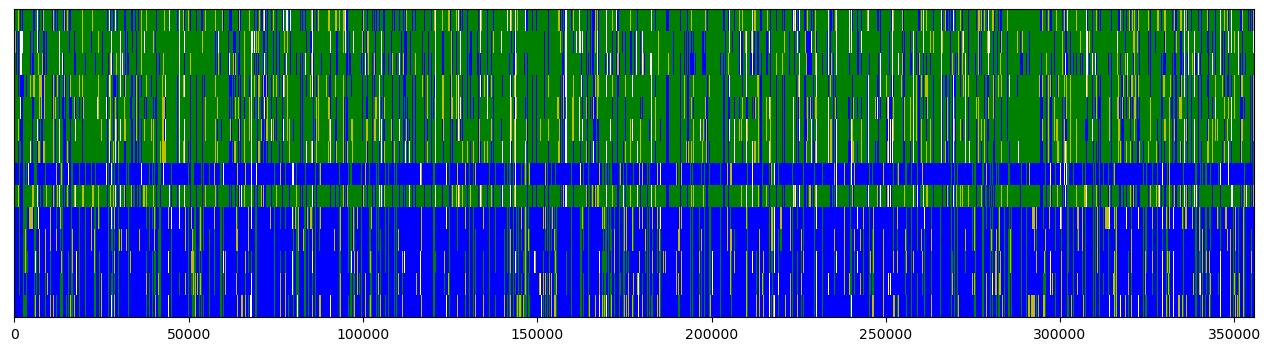

In [35]:
diem.utils.plot_painting(dAdvancedPolTest.DMBC[1])